In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import mountains
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mountain_detail, routes, weather_data = mountains.call_data()

In [26]:
def to_mountainrte(rte):
    route = []
    for key,value in rte.items():
        for v in value:
            route.append([key] + list(v))
    return pd.DataFrame(route)

def to_mountainwea(wea):
    weather = []
    for key,value in wea.items():
        for v in value:
            weather.append([key] + list(v))
    return pd.DataFrame(weather)


In [27]:
fin_routes = to_mountainrte(routes)
fin_routes.columns = ['Mountain','Route','Class',
                     'Snow','ElevationGain','RTMileage']
fin_routes[["ElevationGain","RTMileage"]] = fin_routes[["ElevationGain","RTMileage"]].apply(pd.to_numeric)

In [28]:
fin_weather = to_mountainwea(weather_data)
fin_weather.columns = ['Mountain','Date','Temp',
                     'WindLow','WindHigh','Description']
fin_weather[["Temp","WindLow","WindLow","WindHigh"]] =\
fin_weather[["Temp","WindLow","WindLow","WindHigh"]].apply(pd.to_numeric)
fin_weather['Date'] = pd.to_datetime(fin_weather['Date'])
fin_weather['Hour'] = pd.DatetimeIndex(fin_weather['Date']).hour

In [29]:

fin_mountain = pd.DataFrame.from_dict(mountain_detail).T
fin_mountain.index.name = 'Mountain'
fin_mountain.columns = ['Elevation','Rank',
                     'Range']
fin_mountain.reset_index(level=0, inplace=True)

In [30]:
# How many mountains are in each class 
# Is gain related to class
routes_class = fin_routes.groupby('Class').agg({'ElevationGain': \
    ['min', 'max','median','mean','std'],'RTMileage': ['min', 'max','median','mean','std'], 'Mountain':['nunique']})

In [31]:
# What is the longest/shortest/avg route
routes_insight = fin_routes.groupby('Route').agg({'ElevationGain': ['min', 'max'],'RTMileage': ['min', 'max'],\
                                                  'Mountain':['nunique']})
mountain_route_insight = fin_routes.groupby('Mountain').agg({'ElevationGain': ['min', 'max'],'RTMileage': ['min', 'max']})

In [193]:
# How many mountains still have snowpack - and what class are they
snow_routes = pd.DataFrame(fin_routes[fin_routes.Snow != ' '])
mtn_snow_routes = snow_routes.groupby(['Mountain']) \
.agg({'Route': ['nunique'], 'RTMileage': ['mean']}).round(2)
mtn_snow_routes.columns = mtn_snow_routes.columns.get_level_values(0)

type_snow_routes = snow_routes.groupby(['Snow']) \
.agg({'Route': ['nunique'], 'RTMileage': ['sum']}).round(2)
type_snow_routes.columns = type_snow_routes.columns.get_level_values(0)



In [33]:
# Which range is the easiest to knock out (lowest avg elevation gain)
elevation = fin_routes.groupby('Mountain') \
.agg({'ElevationGain': ['min', 'max','median','mean','std','sum'], 'Route': ['count']}).round(2)

In [34]:
range_weather = fin_mountain.merge(fin_weather,left_on='Mountain',right_on='Mountain')
agg_weather = fin_weather.groupby('Date').agg({'Temp': ['min', 'max','median','mean','std'], \
                                               'WindHigh': ['min', 'max','median','mean','std']})
range_weather[["Temp","WindLow","WindLow","WindHigh","Rank","Elevation"]] = range_weather[["Temp",\
                "WindLow","WindLow","WindHigh","Rank","Elevation"]].apply(pd.to_numeric)

range_weather_insights =range_weather.groupby('Range').agg({'Elevation':['min', 'max','median','mean','std'], \
            'Rank':['min', 'max','median','mean','std'],'Temp':['min', 'max','median','mean','std'],\
                                    'WindHigh':['min', 'max','median','mean','std'],'Mountain':['nunique']})

[Text(0, 0.5, 'Median Elevation Gain')]

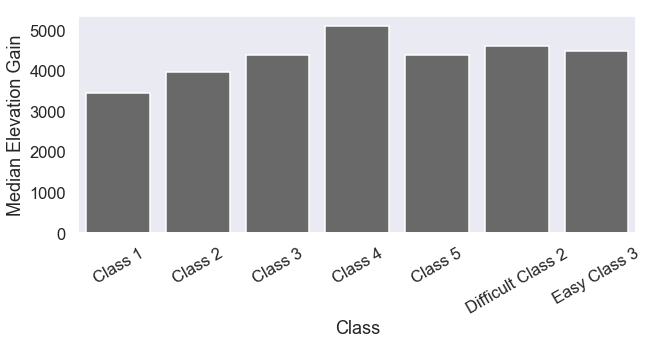

In [64]:
import seaborn as sns
import matplotlib
plt.rcParams['figure.figsize']=(10,4)
sns.set_style("dark")
sns.set_context("talk", font_scale=1)
z = sns.barplot(x=routes_class.index, y="median", data=routes_class['ElevationGain'],color="dimgray")
z.set_xticklabels(routes_class.index,rotation=30)
z.set(ylabel='Median Elevation Gain')

[Text(0.5, 0, 'Median Round Trip Mileage')]

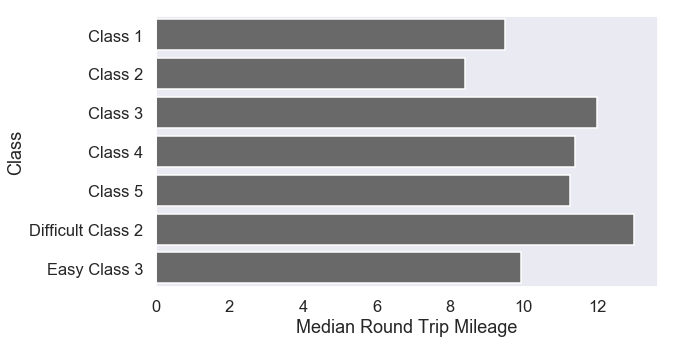

In [36]:
plt.rcParams['figure.figsize']=(9,5)
z = sns.barplot(y=routes_class.index, x="median", data=routes_class['RTMileage'],color='dimgray')
#z.set_xticklabels(routes_class.index,rotation=30)
z.set(xlabel='Median Round Trip Mileage')

In [37]:
mri_elevation = mountain_route_insight['ElevationGain'].sort_values(by='max',ascending=False)#[:10]
mri_mileage = mountain_route_insight['RTMileage'].sort_values(by='max',ascending=False)#[:10]

[Text(0, 0.5, 'Longest Round Trip Mileage'),
 Text(0.5, 0, 'Longest Route (Miles)')]

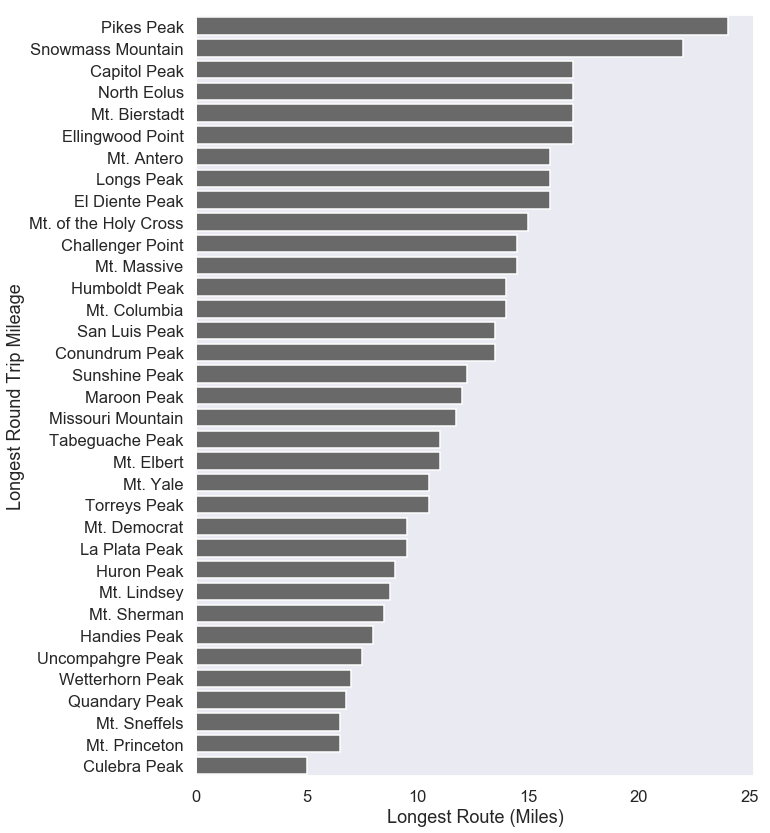

In [38]:
plt.rcParams['figure.figsize']=(10,14) 
z = sns.barplot(x="max", y=mri_mileage.index, \
                data=mri_mileage,color='dimgray')
z.set(ylabel='Longest Round Trip Mileage', xlabel="Longest Route (Miles)")

[Text(0, 0.5, 'Frequency of Distance'), Text(0.5, 0, 'Distance (Miles)')]

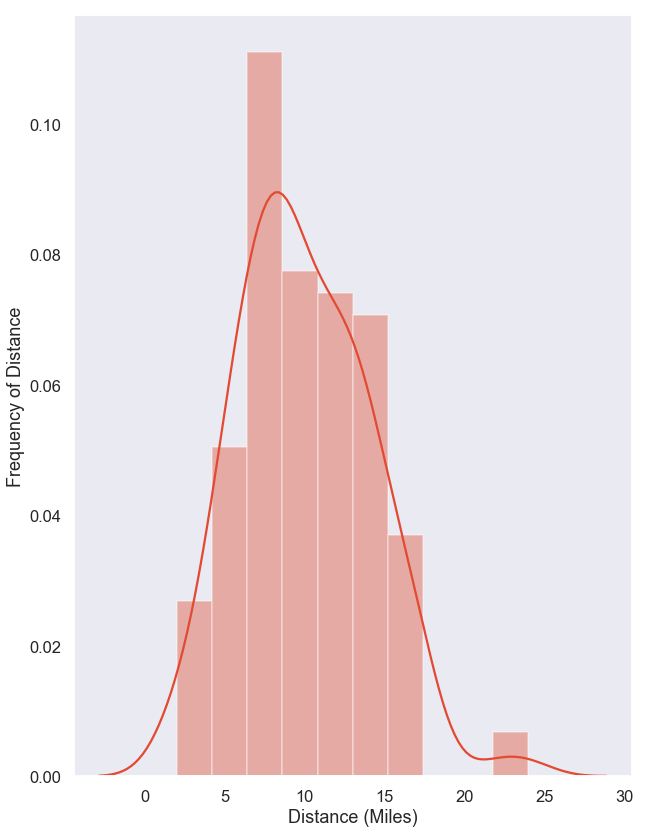

In [15]:
z = sns.distplot(fin_routes['RTMileage'],)
z.set(ylabel='Frequency of Distance', xlabel="Distance (Miles)")

[Text(0, 0.5, 'Frequency of Elevation'), Text(0.5, 0, 'Elevation (Feet)')]

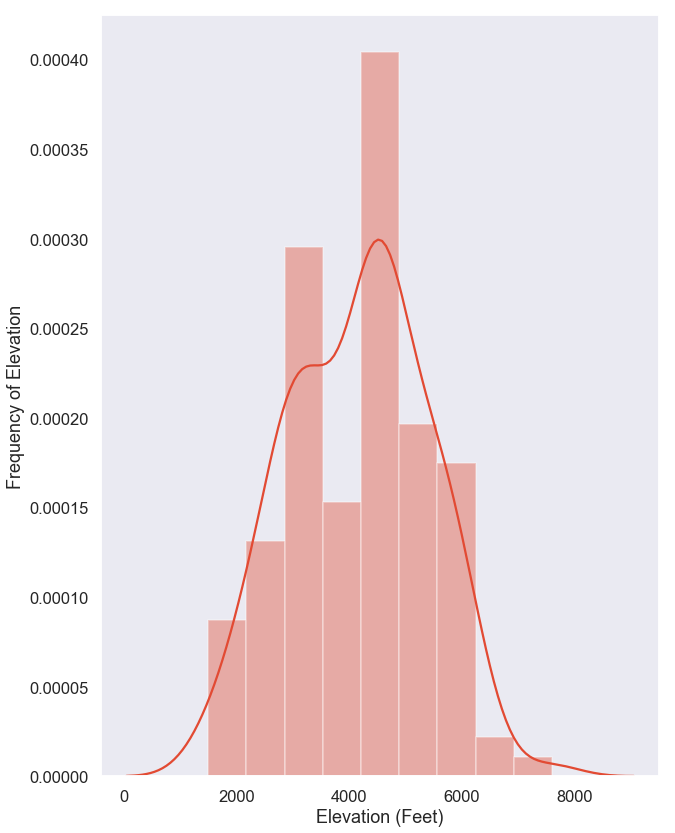

In [16]:
z = sns.distplot(fin_routes['ElevationGain'],)
z.set(ylabel='Frequency of Elevation', xlabel="Elevation (Feet)")

[Text(0.5, 122.0, 'Afternoon Weather')]

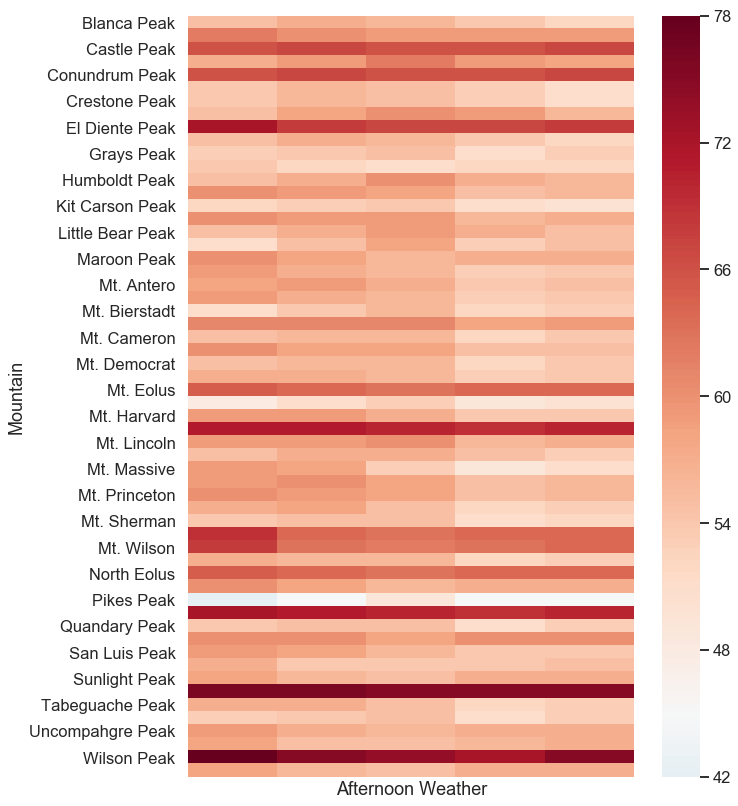

In [39]:
plt.rcParams['figure.figsize']=(10,14)
am_weather = fin_weather[fin_weather['Hour']==0]
wheatm = am_weather.pivot("Mountain", "Date", "Temp")
heat_map = sns.heatmap(wheatm,cmap="RdBu_r",center=45,xticklabels='')
heat_map.set( xlabel="Afternoon Weather")

[Text(0.5, 122.0, 'Evening Weather')]

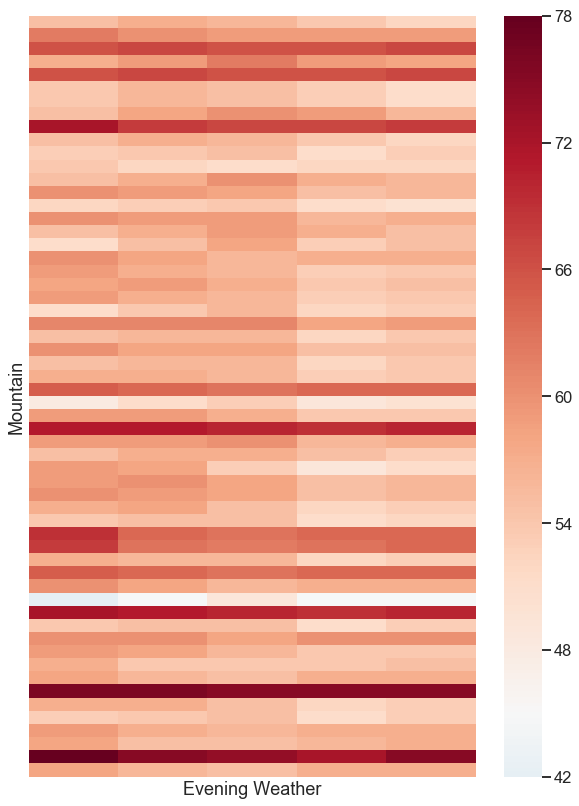

In [40]:
pm_weather = fin_weather[fin_weather['Hour']==0]
pm_map = pm_weather.pivot("Mountain", "Date", "Temp")
heat_map = sns.heatmap(pm_map,cmap="RdBu_r",center=45,xticklabels='' ,yticklabels='')
heat_map.set( xlabel="Evening Weather")

In [142]:
mtn_snow_routes

,Route,RTMileage
,nunique,mean
Mountain,,
Challenger Point,2,13.25
Conundrum Peak,2,12.50
El Diente Peak,1,12.00
Handies Peak,1,5.00
Humboldt Peak,1,8.00
La Plata Peak,1,8.75
Maroon Peak,1,8.00
Missouri Mountain,2,8.12


[Text(0, 0, 'Challenger Point'),
 Text(0, 0, 'Conundrum Peak'),
 Text(0, 0, 'El Diente Peak'),
 Text(0, 0, 'Handies Peak'),
 Text(0, 0, 'Humboldt Peak'),
 Text(0, 0, 'La Plata Peak'),
 Text(0, 0, 'Maroon Peak'),
 Text(0, 0, 'Missouri Mountain'),
 Text(0, 0, 'Mt. Bierstadt'),
 Text(0, 0, 'Mt. Columbia'),
 Text(0, 0, 'Mt. Democrat'),
 Text(0, 0, 'Mt. Elbert'),
 Text(0, 0, 'Mt. Lindsey'),
 Text(0, 0, 'Mt. Sherman'),
 Text(0, 0, 'Mt. of the Holy Cross'),
 Text(0, 0, 'Quandary Peak'),
 Text(0, 0, 'Tabeguache Peak'),
 Text(0, 0, 'Torreys Peak'),
 Text(0, 0, 'Wetterhorn Peak')]

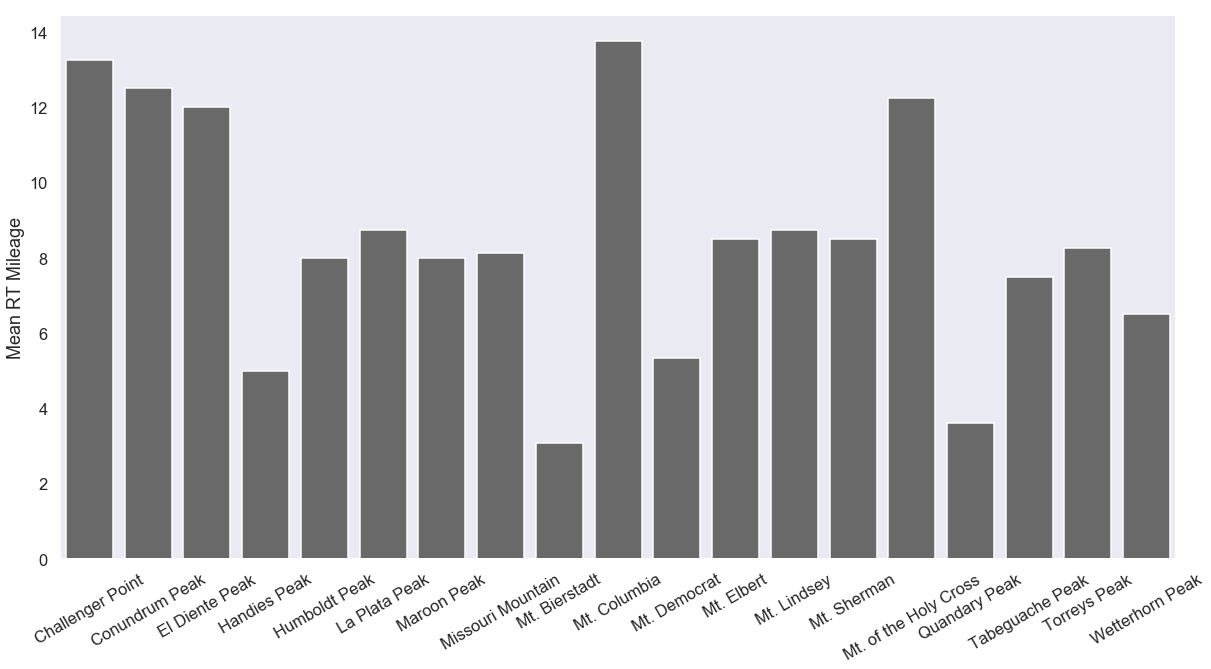

In [181]:
plt.rcParams['figure.figsize']=(20,10) 
z = sns.barplot(x=mtn_snow_routes.index, y='RTMileage', \
               data=mtn_snow_routes,color='dimgray')
z.set(xlabel='', ylabel='Mean RT Mileage')
z.set_xticklabels(mtn_snow_routes.index,rotation=30)

[Text(0, 0.5, ''), Text(0.5, 0, 'Total Covered Mileage')]

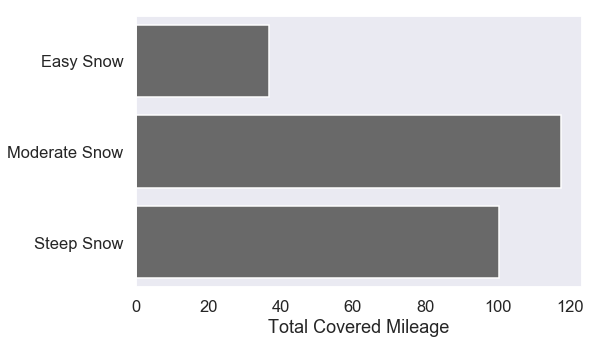

In [197]:
plt.rcParams['figure.figsize']=(8,5) 
z = sns.barplot(y=type_snow_routes.index, x='RTMileage', \
               data=type_snow_routes,color='dimgray')
z.set(ylabel='', xlabel='Total Covered Mileage')
#z.set_xticklabels(type_snow_routes.index,rotation=30)
#snow_routes['RTMileage']
#elevation
    #elevation.ElevationGain.sort_values(by='min')
    #elevation.ElevationGain.sort_values(by='max')
    #elevation.ElevationGain.sort_values(by='median')
#agg_weather
    #agg_weather['Temp']
    #agg_weather['WindHigh']
#range_weather_insights
#fin_mountain
#fin_routes
#fin_weather

In [167]:
mtn_snow_routes.columns = mtn_snow_routes.columns.get_level_values(0)



Index(['Route', 'RTMileage'], dtype='object')